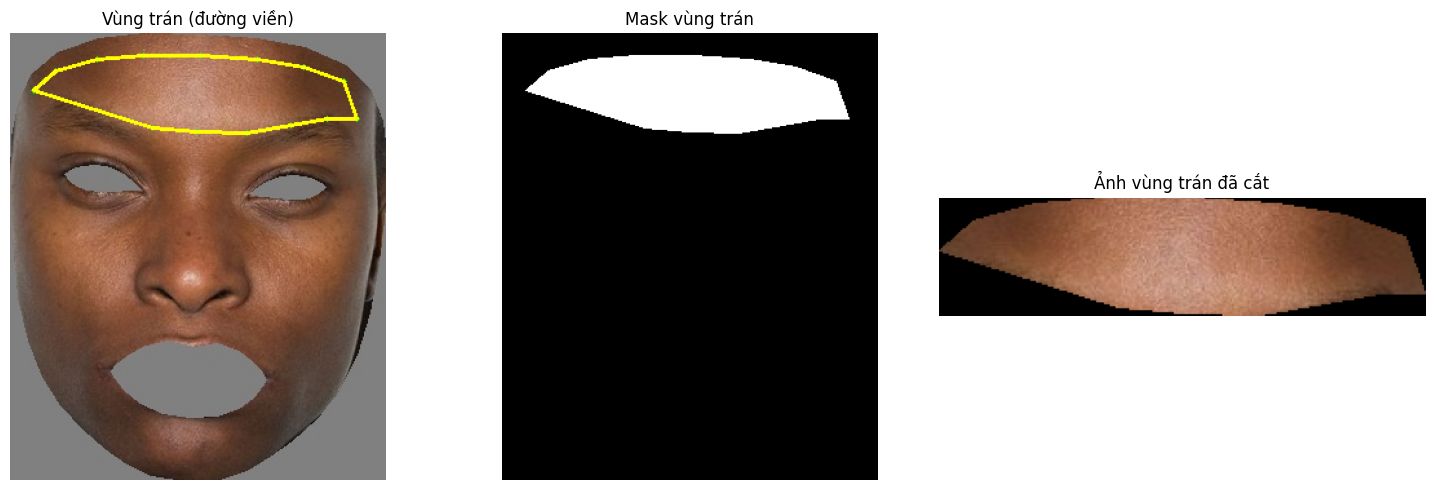

In [15]:
import cv2
import numpy as np
import mediapipe as mp
import matplotlib.pyplot as plt

# Khởi tạo FaceMesh
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(
    static_image_mode=True,
    max_num_faces=1,
    refine_landmarks=True,
    min_detection_confidence=0.5
)

# Các điểm landmark tạo vùng trán
FOREHEAD_LANDMARKS = [54,103,67,109,10,338,297,332,298,334,296,336,9,107
                      ]

def draw_forehead_polygon(image, points):
    """Vẽ đường viền vùng trán bằng các điểm landmark"""
    annotated = image.copy()
    for pt in points:
        cv2.circle(annotated, pt, 2, (0, 255, 0), -1)
    cv2.polylines(annotated, [np.array(points, dtype=np.int32)], isClosed=True, color=(0, 255, 255), thickness=2)
    return annotated

def extract_forehead(image):
    img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = face_mesh.process(img_rgb)

    if not results.multi_face_landmarks:
        print("❌ Không phát hiện khuôn mặt.")
        return None, None, None

    h, w, _ = image.shape
    landmarks = results.multi_face_landmarks[0]

    forehead_points = []
    for idx in FOREHEAD_LANDMARKS:
        x = int(landmarks.landmark[idx].x * w)
        y = int(landmarks.landmark[idx].y * h)
        forehead_points.append((x, y))

    # Mask vùng trán
    mask = np.zeros(image.shape[:2], dtype=np.uint8)
    cv2.fillPoly(mask, [np.array(forehead_points, dtype=np.int32)], 255)

    # Cắt vùng trán
    forehead_only = cv2.bitwise_and(image, image, mask=mask)
    x, y, w_box, h_box = cv2.boundingRect(np.array(forehead_points))
    forehead_crop = forehead_only[y:y+h_box, x:x+w_box]

    # Ảnh có vẽ polygon
    image_with_poly = draw_forehead_polygon(image, forehead_points)

    return forehead_crop, mask, image_with_poly

# ===== Ví dụ sử dụng =====
image_path = "D:/KLTN/SKINTONE/pre_processing/data1/output_face_crop/dark/0a5c6e7a4cca861d4f6b0b641e7d41ae.jpg"  # Thay ảnh tại đây
image = cv2.imread(image_path)

forehead_crop, mask, annotated = extract_forehead(image)

if forehead_crop is not None:
    # Hiển thị kết quả
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(annotated, cv2.COLOR_BGR2RGB))
    plt.title("Vùng trán (đường viền)")
    plt.axis("off")

    plt.subplot(1, 3, 2)
    plt.imshow(mask, cmap="gray")
    plt.title("Mask vùng trán")
    plt.axis("off")

    plt.subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(forehead_crop, cv2.COLOR_BGR2RGB))
    plt.title("Ảnh vùng trán đã cắt")
    plt.axis("off")

    plt.tight_layout()
    plt.show()
else:
    print("Không cắt được vùng trán.")


In [ ]:
import os
import cv2

TONE_SAMPLE_DIR = "D:/KLTN/SKINTONE/public/skin tone values"

for folder in os.listdir(TONE_SAMPLE_DIR):
    folder_path = os.path.join(TONE_SAMPLE_DIR, folder)
    if not os.path.isdir(folder_path):
        continue
    print(f"Đang kiểm tra: {folder}")
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        img = cv2.imread(img_path)
        if img is None:
            print(f"Không đọc được ảnh: {img_name} trong {folder}")
        else:
            print(f"Ảnh OK: {img_name}")
    print()


📁 Đang kiểm tra: Type_1
✅ Ảnh OK: 1.jpeg
✅ Ảnh OK: 2.jpeg
✅ Ảnh OK: 3.jpeg
✅ Ảnh OK: 4.jpeg
✅ Ảnh OK: 5.jpeg
✅ Ảnh OK: 6.jpeg

📁 Đang kiểm tra: Type_2
✅ Ảnh OK: 10.jpeg
✅ Ảnh OK: 11.jpeg
✅ Ảnh OK: 12.jpeg
✅ Ảnh OK: 13.jpeg
✅ Ảnh OK: 7.jpeg
✅ Ảnh OK: 8.jpeg
✅ Ảnh OK: 9.jpeg

📁 Đang kiểm tra: Type_3
✅ Ảnh OK: 14.jpeg
✅ Ảnh OK: 15.jpeg
✅ Ảnh OK: 16.jpeg
✅ Ảnh OK: 17.jpeg
✅ Ảnh OK: 18.jpeg
✅ Ảnh OK: 19.jpeg
✅ Ảnh OK: 20.jpeg

📁 Đang kiểm tra: Type_4
✅ Ảnh OK: 21.jpeg
✅ Ảnh OK: 22.jpeg
✅ Ảnh OK: 23.jpeg
✅ Ảnh OK: 24.jpeg
✅ Ảnh OK: 25.jpeg
✅ Ảnh OK: 26.jpeg
✅ Ảnh OK: 27.jpeg

📁 Đang kiểm tra: Type_5
✅ Ảnh OK: 28.jpeg
✅ Ảnh OK: 29.jpeg
✅ Ảnh OK: 30.jpeg
✅ Ảnh OK: 31.jpeg
✅ Ảnh OK: 32.jpeg
✅ Ảnh OK: 33.jpeg
✅ Ảnh OK: 34.jpeg

📁 Đang kiểm tra: Type_6
✅ Ảnh OK: 35.jpeg
✅ Ảnh OK: 36.jpeg



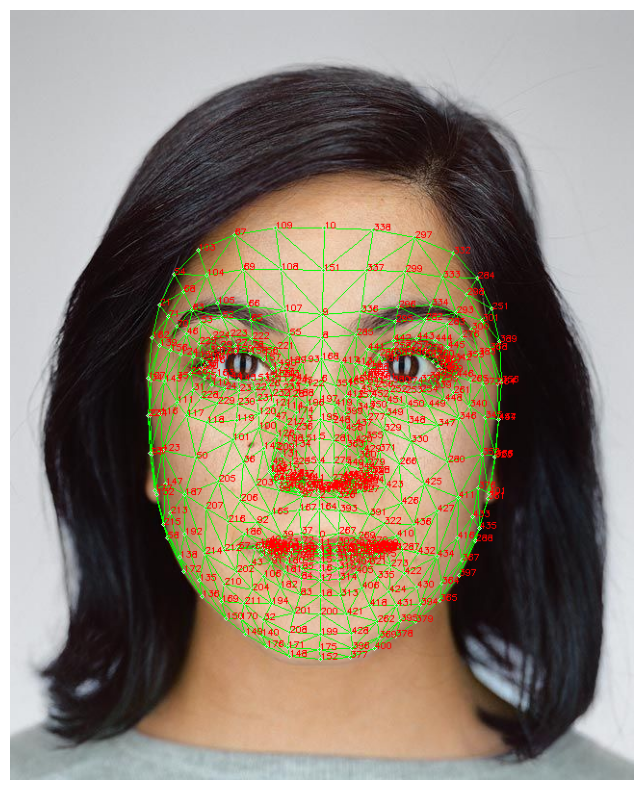

In [3]:
import cv2
import mediapipe as mp

# Đường dẫn đến ảnh
image_path = "D:/KLTN/SKINTONE/public/test4/0c4e7473e7e82503bf1dc2d2328112a6.jpg"  # ← thay bằng đường dẫn ảnh của bạn

# Khởi tạo FaceMesh
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(static_image_mode=True, max_num_faces=1)

# Khởi tạo công cụ vẽ
mp_drawing = mp.solutions.drawing_utils
drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1, color=(0,255,0))

# Đọc ảnh
img = cv2.imread(image_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
results = face_mesh.process(img_rgb)

# Vẽ điểm lên ảnh nếu phát hiện khuôn mặt
if results.multi_face_landmarks:
    for face_landmarks in results.multi_face_landmarks:
        mp_drawing.draw_landmarks(
            image=img,
            landmark_list=face_landmarks,
            connections=mp_face_mesh.FACEMESH_TESSELATION,
            landmark_drawing_spec=drawing_spec,
            connection_drawing_spec=drawing_spec
        )

        # In số thứ tự các điểm landmark lên ảnh
        ih, iw, _ = img.shape
        for idx, lm in enumerate(face_landmarks.landmark):
            x, y = int(lm.x * iw), int(lm.y * ih)
            cv2.putText(img, str(idx), (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.3, (0, 0, 255), 1)

# Hiển thị ảnh
import matplotlib.pyplot as plt

# Hiển thị bằng matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.imshow(img_rgb)
plt.axis('off')
plt.show()
